<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Пропуски-и-дубликаты" data-toc-modified-id="Пропуски-и-дубликаты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски и дубликаты</a></span></li><li><span><a href="#Проверка-и-корректировка-типов-данных" data-toc-modified-id="Проверка-и-корректировка-типов-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка и корректировка типов данных</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка выбросов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Определение-временных-границ" data-toc-modified-id="Определение-временных-границ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение временных границ</a></span></li><li><span><a href="#Топ-10-филиалов-по-выплатам" data-toc-modified-id="Топ-10-филиалов-по-выплатам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Топ-10 филиалов по выплатам</a></span></li><li><span><a href="#Тип-оплаты-страхового-случая" data-toc-modified-id="Тип-оплаты-страхового-случая-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тип оплаты страхового случая</a></span></li><li><span><a href="#Год-выпуска-авто" data-toc-modified-id="Год-выпуска-авто-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Год выпуска авто</a></span></li><li><span><a href="#Выплаты-с-перестраховочным-пулом" data-toc-modified-id="Выплаты-с-перестраховочным-пулом-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выплаты с перестраховочным пулом</a></span></li><li><span><a href="#Выплаты-с-новой-ЕМ" data-toc-modified-id="Выплаты-с-новой-ЕМ-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Выплаты с новой ЕМ</a></span></li><li><span><a href="#Процесс-урегулирования" data-toc-modified-id="Процесс-урегулирования-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Процесс урегулирования</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Предобработка данных

### Импорт библиотек

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests 
from io import BytesIO
#!pip install pandas-profiling
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
# установка стиля 
sns.set_style("whitegrid")
sns.set_context("notebook")

In [3]:
# импорт таблицы
spreadsheet_id = '1VAAAlZAyOqQHUYtnmiR_eSUg9xJIceQi'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id) 

r = requests.get(file_name)
data  = pd.read_csv(BytesIO(r.content), decimal=',')
data.head()

,Филиал обращения,Дата выплаты,Сумма выплаты,Процесс урегулирования,Заявление на выплату.Объект потерпевшего.Год выпуска,Категория года выпуска,Тип выплаты,Наличие заключенного Соглашения,Перестраховочный пул ОСАГО с 19.04.2022,"События с 19.06.2022, на которые распространяется новая ЕМ"
0,Абаканский филиал,7/19/2021,9300.0,ОСАГО (ПВУ),2012,Старше 2-х лет,Соглашение,Да,NaN,NaN
1,Абаканский филиал,7/19/2021,14310.0,ОСАГО (ПВУ),2006,Старше 2-х лет,Соглашение,Да,NaN,NaN
2,Абаканский филиал,7/19/2021,13230.0,ОСАГО (ПВУ),2002,Старше 2-х лет,Соглашение,Да,NaN,NaN
3,Абаканский филиал,7/21/2021,29160.0,ОСАГО (ПВУ),2006,Старше 2-х лет,Соглашение,Да,NaN,NaN
4,Абаканский филиал,7/21/2021,11700.0,ОСАГО (ПВУ),1999,Старше 2-х лет,Соглашение,Да,NaN,NaN


In [4]:
# переименование столбцов
data = data.rename(columns={'Филиал обращения':'branch','Дата выплаты':'payment_date','Сумма выплаты':'amount', 
                            'Процесс урегулирования':'settlement_process', 
                            'Заявление на выплату.Объект потерпевшего.Год выпуска':'release_year', 
                            'Категория года выпуска':'category_release_year', 
                            'Тип выплаты':'payment_type','Наличие заключенного Соглашения':'concluded_agreement', 
                            'Перестраховочный пул ОСАГО с 19.04.2022':'reinsurance_pool', 
                            'События с 19.06.2022, на которые распространяется новая ЕМ':'new_em'})
# проверка результата
data.columns

Index(['branch', 'payment_date', 'amount', 'settlement_process',
       'release_year', 'category_release_year', 'payment_type',
       'concluded_agreement', 'reinsurance_pool', 'new_em'],
      dtype='object')

In [5]:
#profile_dataset = ProfileReport(data, title="Pandas Profiling Report")
#profile_dataset

### Пропуски и дубликаты

Проведём разведочный анализ данных.

In [6]:
print('Пропущенные значения')
data.isna().sum()

Пропущенные значения


branch                       0
payment_date                 0
amount                       0
settlement_process           0
release_year                 0
category_release_year        0
payment_type                 0
concluded_agreement      14094
reinsurance_pool         77558
new_em                   76772
dtype: int64

Пропущенные значения в столбцах concluded_agreement (Наличие заключенного Соглашения), reinsurance_pool (Перестраховочный пул ОСАГО с 19.04.2022), new_em (События с 19.06.2022, на которые распространяется новая ЕМ) принимаем за факт отрицательного ответа в отношении соответствующих признаков.  

In [7]:
print('Количество продублированных строк')
data.duplicated().sum()

Количество продублированных строк


85

Количество дубликатов: 85, что составляет примерно 0.1% от всего объема данных. В датасете отсутствует конкретизирующая информация о времени и участниках ДТП, по которым происходят выплаты, поэтому нет уверенности в том, что данные строки являются дубликатами, а не повторяющимися событиями. Удалять продублированных строки не нужно.  

### Проверка и корректировка типов данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77743 entries, 0 to 77742
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   branch                 77743 non-null  object 
 1   payment_date           77743 non-null  object 
 2   amount                 77743 non-null  float64
 3   settlement_process     77743 non-null  object 
 4   release_year           77743 non-null  int64  
 5   category_release_year  77743 non-null  object 
 6   payment_type           77743 non-null  object 
 7   concluded_agreement    63649 non-null  object 
 8   reinsurance_pool       185 non-null    object 
 9   new_em                 971 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.9+ MB


In [9]:
# преобразуем дату в формат datetime64
data['payment_date'] = pd.to_datetime(data['payment_date'])

### Обработка выбросов 

Рассмотрим какие значения присутствуют в категориальных столбцах 'branch', 'settlement_process', 'category_release_year', 'payment_type'.

In [10]:
# уникальные значения столбцов
columns = ['branch', 'settlement_process', 'category_release_year', 'payment_type', 'concluded_agreement', 
           'reinsurance_pool', 'new_em']
for item in columns:
    print(item)
    print(data[item].value_counts())
    print()  

branch
Тюменский филиал           5463
Екатеринбургский филиал    3576
Якутский филиал            2571
Кировский филиал           2484
Краснодарский филиал       2458
                           ... 
Олекминский филиал            3
Хандыгинский филиал           2
Оленекский филиал             1
Зырянский филиал              1
Улан-Удэнский филиал          1
Name: branch, Length: 138, dtype: int64

settlement_process
ОСАГО (ПВУ)         57467
ОСАГО (Традиция)    20276
Name: settlement_process, dtype: int64

category_release_year
Старше 2-х лет    70300
Менее 2-х лет      6948
Не указан           495
Name: category_release_year, dtype: int64

payment_type
Соглашение     63649
СТОА            7656
Калькуляция     6438
Name: payment_type, dtype: int64

concluded_agreement
Да    63649
Name: concluded_agreement, dtype: int64

reinsurance_pool
Да    185
Name: reinsurance_pool, dtype: int64

new_em
Да    971
Name: new_em, dtype: int64



Проверим на выбросы количественный столбец 'amount'.

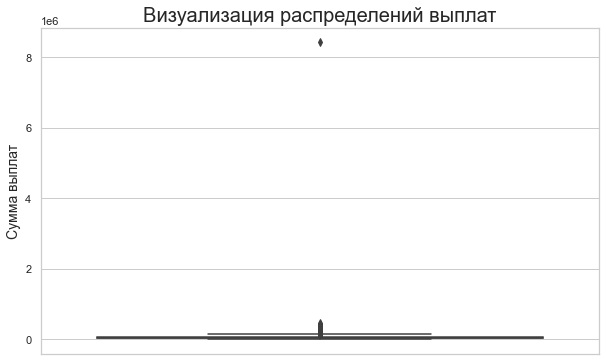

In [11]:
plt.subplots(figsize=(10, 6))
sns.boxplot(y="amount", data=data).set_title('Визуализация распределений выплат', fontsize=20)
plt.ylabel('Сумма выплат', fontsize=14);

На диаграмме отображена медиана (2-ой квартиль), 1-ый и 3-ий квартили (в данном случае линии квартилей слились в одну из-за большого разброса данных столбца 'amount'), которые формируют межквартильный размах. Если отложить вверх и вниз по полтора межквартильных размаха, то последние значения признака на этих промежутках формируют границы усов, значения вне этих границ будут определяться как выбросы, они отображаются отдельными точками. На графике boxplot зафиксирована точка, значение которой критично аномально.

In [12]:
data['amount'].max()

8422156.37

In [13]:
data.query('amount == 8422156.37')

,branch,payment_date,amount,settlement_process,release_year,category_release_year,payment_type,concluded_agreement,reinsurance_pool,new_em
55996,Сургутский нефтегазовый филиал,2022-02-28,8422156.37,ОСАГО (Традиция),2012,Старше 2-х лет,Калькуляция,NaN,NaN,NaN


Дальнейший анализ проведем без аномальной выплаты, удалим строку, где amount = 8422156.37. Вышеуказанную строку следует проверить на корректность внесения информации.

In [14]:
df = data.query('amount != 8422156.37')

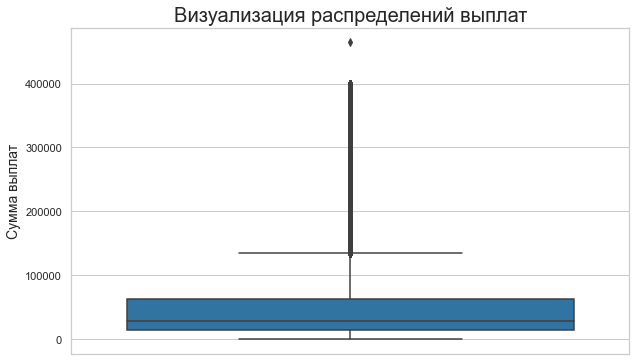

In [15]:
plt.subplots(figsize=(10, 6))
sns.boxplot(y="amount", data=df).set_title('Визуализация распределений выплат', fontsize=20)
plt.ylabel('Сумма выплат', fontsize=14);

Проверим на выбросы количественный столбец 'release_year', обозначающий год выпуска авто.

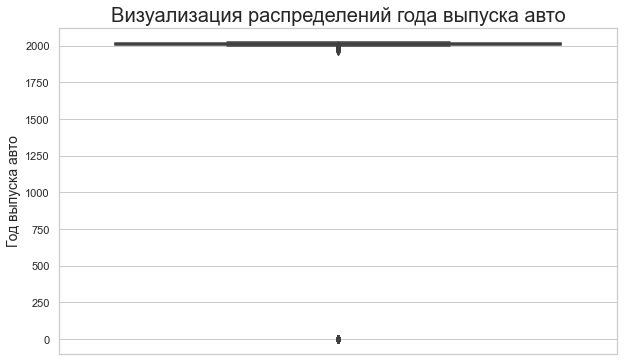

In [16]:
plt.subplots(figsize=(10, 6))
sns.boxplot(y="release_year", data=df).set_title('Визуализация распределений года выпуска авто', fontsize=20)
plt.ylabel('Год выпуска авто', fontsize=14);

In [17]:
df.query('release_year == 0').head()

,branch,payment_date,amount,settlement_process,release_year,category_release_year,payment_type,concluded_agreement,reinsurance_pool,new_em
289,Абаканский филиал,2022-03-11,13475.73,ОСАГО (Традиция),0,Не указан,Соглашение,Да,NaN,NaN
339,Абаканский филиал,2022-04-08,125587.00,ОСАГО (Традиция),0,Не указан,Калькуляция,NaN,NaN,NaN
384,Абаканский филиал,2022-06-06,5292.00,ОСАГО (Традиция),0,Не указан,Калькуляция,NaN,NaN,NaN
537,Алданский филиал,2022-06-23,179468.16,ОСАГО (Традиция),0,Не указан,Соглашение,Да,NaN,NaN
921,Альметьевский филиал,2021-09-17,28182.70,ОСАГО (Традиция),0,Не указан,Соглашение,Да,NaN,NaN


В датасете существуют записи, где 'release_year' равен 0. Скорее всего информация заполнена не полностью, отсутствующие значения обозначены нулем. Найдем количество записей, в которых столбец 'release_year' = 0.

In [18]:
df.query('release_year == 0').count()

branch                   495
payment_date             495
amount                   495
settlement_process       495
release_year             495
category_release_year    495
payment_type             495
concluded_agreement      324
reinsurance_pool           2
new_em                     0
dtype: int64

В 495 строках 'release_year' = 0, что составляет примерно 0.6% от общего объема данных. Заменим 'release_year' = 0 на 'release_year' = медианному значению.

In [19]:
df.query('release_year != 0').describe()

,amount,release_year
count,77247.000000,77247.000000
mean,54135.527620,2011.474400
std,71300.262523,6.307518
min,2.000000,1964.000000
25%,14300.000000,2008.000000
50%,28600.000000,2012.000000
75%,62400.000000,2017.000000
max,464550.000000,2022.000000


In [20]:
df.loc[df['release_year'] == 0,'release_year'] = 2011

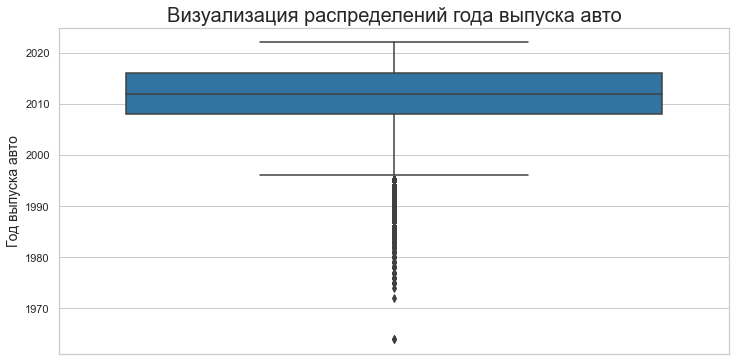

In [21]:
plt.subplots(figsize=(12, 6))
sns.boxplot(y="release_year", data=df).set_title('Визуализация распределений года выпуска авто', fontsize=20)
plt.ylabel('Год выпуска авто', fontsize=14);

Проверим все ли выплаты с перестраховочным пулом зафиксированы с 19.04.22 г. 

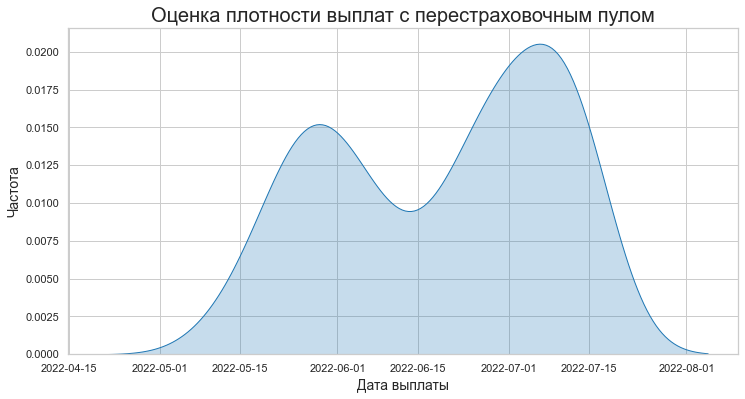

In [22]:
plt.subplots(figsize=(12, 6))
sns.kdeplot(df.query('reinsurance_pool =="Да"')["payment_date"], shade=True).\
set_title('Оценка плотности выплат с перестраховочным пулом', fontsize=20)
plt.xlabel('Дата выплаты', fontsize=14)
plt.ylabel('Частота', fontsize=14);

In [23]:
df.query('reinsurance_pool =="Да"')["payment_date"].min()

Timestamp('2022-05-11 00:00:00')

Выплаты с перестраховочным пулом зафиксированы не ранее 19.04.22 г.

Проверим все ли выплаты с новой ем системой зафиксированы с 19.06.22 г.

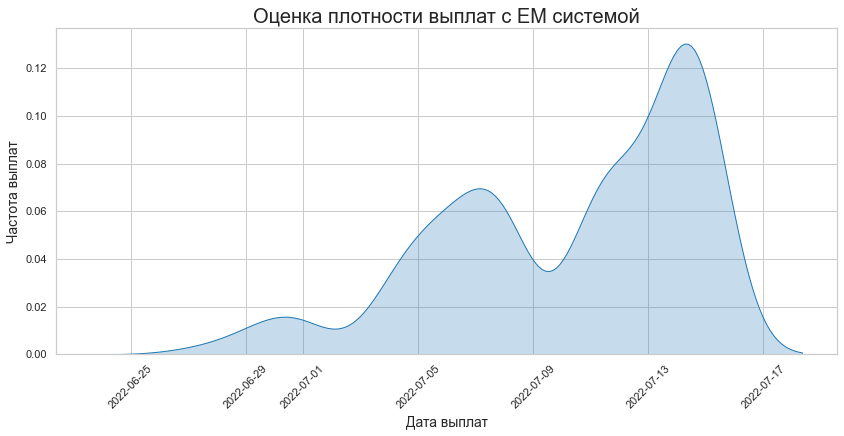

In [24]:
plt.subplots(figsize=(14, 6))
sns.kdeplot(df.query('new_em =="Да"')["payment_date"], shade=True).\
set_title('Оценка плотности выплат с ЕМ системой', fontsize=20)
plt.tick_params(axis = 'x', labelrotation = 45)
plt.xlabel('Дата выплат', fontsize=14)
plt.ylabel('Частота выплат', fontsize=14);

In [25]:
df.query('new_em =="Да"')["payment_date"].min()

Timestamp('2022-06-27 00:00:00')

Выплаты с выплаты с новой ем системой зафиксированы не ранее 19.06.22 г.

## Исследовательский анализ данных

### Определение временных границ

Определим за какой период располагаем данными. Найдём максимальную и минимальную дату. Построим гистограмму по дате, оценим плотность страховых выплат.

In [26]:
data['payment_date'].max()

Timestamp('2022-07-15 00:00:00')

In [27]:
data['payment_date'].min()

Timestamp('2021-07-19 00:00:00')

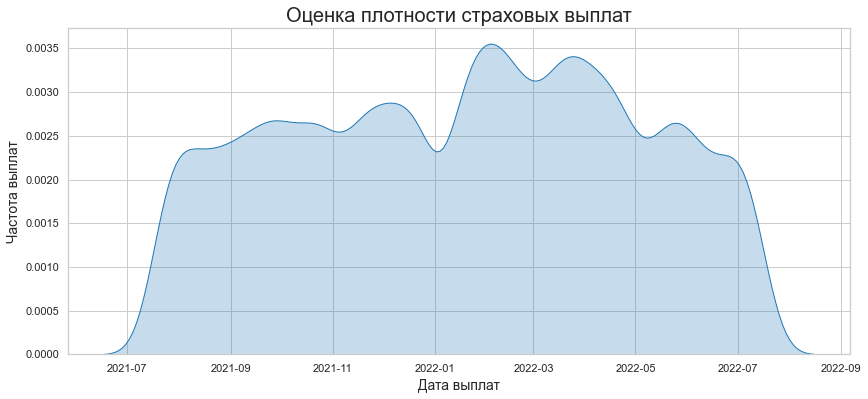

In [28]:
plt.subplots(figsize=(14, 6))
sns.kdeplot(df["payment_date"], shade=True).\
set_title('Оценка плотности страховых выплат', fontsize=20)
plt.xlabel('Дата выплат', fontsize=14)
plt.ylabel('Частота выплат', fontsize=14);

Располагаем данными за период с 2021-07-19 по 2022-07-15. Максимальная плотность страховых выплат пришлась на зимне-весенний период февраль-апрель 2022 г.

In [29]:
amount_sum = df.groupby('payment_date').\
    agg({'amount':'sum'}).rename(columns={'amount':'sum'})
amount_sum

,sum
payment_date,
2021-07-19,14782406.94
2021-07-20,10978791.13
2021-07-21,14591717.39
2021-07-22,16151811.87
2021-07-23,21106657.91
...,...
2022-07-11,14368427.85
2022-07-12,12031269.72
2022-07-13,5256884.72


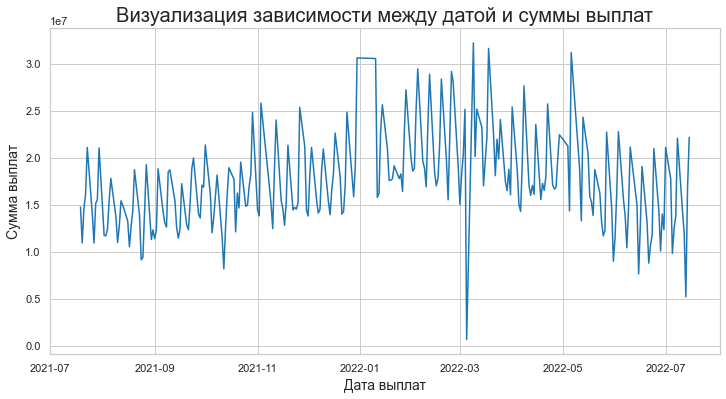

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='payment_date', y='sum', err_style=None, data=amount_sum).\
set_title('Визуализация зависимости между датой и суммы выплат', fontsize=20)
plt.xlabel('Дата выплат', fontsize=14)
plt.ylabel('Сумма выплат', fontsize=14);

Максмальный суммарный размер выплат также зафиксирован в зимне-весенний период.

### Топ-10 филиалов по выплатам

Найдем 10 филиалов, в которых наибольшее суммарное значение страховых выплат.

In [31]:
top10_sum = df.groupby('branch').\
    agg({'amount':'sum'}).sort_values(by = 'amount', ascending = False).reset_index().\
    rename(columns={'amount':'sum'}).head(10)
top10_sum

,branch,sum
0,Тюменский филиал,3.086487e+08
1,Екатеринбургский филиал,1.847084e+08
2,Краснодарский филиал,1.458833e+08
3,Новосибирский филиал,1.427842e+08
4,Московский филиал,1.427229e+08
5,Якутский филиал,1.375410e+08
6,Сургутский филиал,1.231946e+08
7,Кировский филиал,1.174949e+08
8,Нижегородский филиал,1.104463e+08
9,Уфимский филиал,1.066926e+08


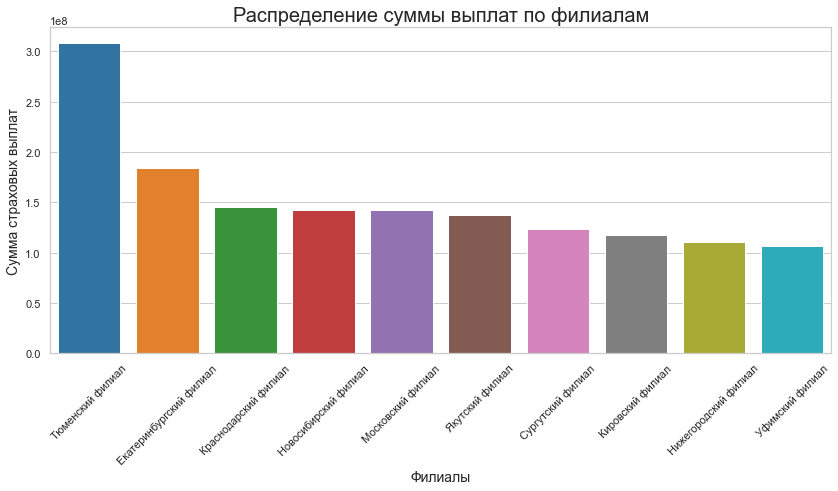

In [32]:
plt.subplots(figsize=(14, 6))
sns.barplot(x='branch', y='sum', data=top10_sum).\
set_title('Распределение суммы выплат по филиалам', fontsize=20)
plt.tick_params(axis = 'x', labelrotation = 45)
plt.xlabel('Филиалы', fontsize=14)
plt.ylabel('Сумма страховых выплат', fontsize=14);

Наибольшее суммарное количество выплат выявлено в Тюменском, Екатеринбургском, Краснодарском, Новосибирском, Московском, Якутском, Сургутском, Кировском, Нижегородском и Уфимском филиале. 

Найдем 10 филиалов, в которых чаще всего одобряют страховые выплаты.

In [33]:
top10_count = df.groupby('branch').\
    agg({'amount':'count'}).sort_values(by = 'amount', ascending = False).reset_index().\
    rename(columns={'amount':'count'}).head(10)
top10_count

,branch,count
0,Тюменский филиал,5463
1,Екатеринбургский филиал,3576
2,Якутский филиал,2571
3,Кировский филиал,2484
4,Краснодарский филиал,2458
5,Сургутский филиал,2329
6,Омский филиал,2089
7,Уфимский филиал,2073
8,Нижегородский филиал,2051
9,Московский филиал,1975


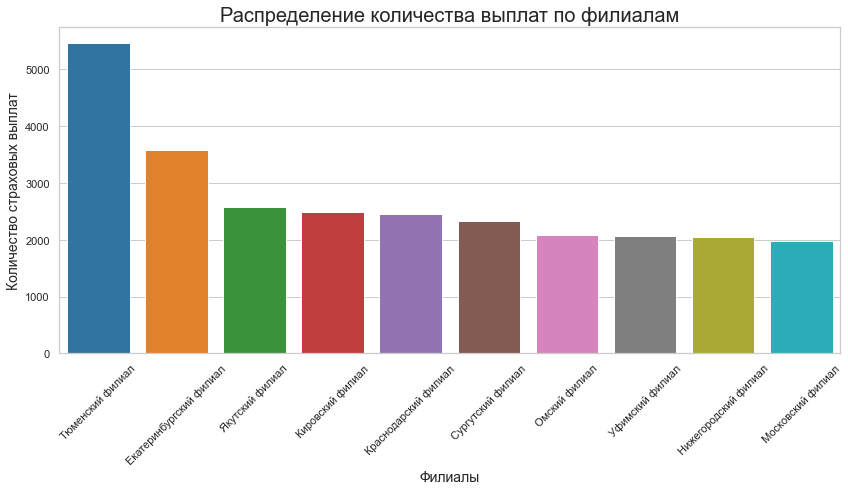

In [34]:
plt.subplots(figsize=(14, 6))
sns.barplot(x='branch', y='count', data=top10_count).\
set_title('Распределение количества выплат по филиалам', fontsize=20)
plt.tick_params(axis = 'x', labelrotation = 45)
plt.xlabel('Филиалы', fontsize=14)
plt.ylabel('Количество страховых выплат', fontsize=14);

Чаще всего одобряют страховые выплаты в тех же филиалах. К списку топ-10 по количеству страховых выплат добавился Омский филиал.

### Тип оплаты страхового случая

Определим количество и сумму выплат по типу оплаты (Соглашение, СТОА, калькуляция).

In [35]:
pay_type = df.groupby('payment_type').\
    agg({'amount':'sum', 'branch':'count'}).sort_values(by = 'amount', ascending = False).reset_index().\
    rename(columns={'amount':'sum', 'branch':'count'}).head(10)
pay_type

,payment_type,sum,count
0,Соглашение,3.161670e+09,63649
1,СТОА,5.466180e+08,7656
2,Калькуляция,5.019298e+08,6437


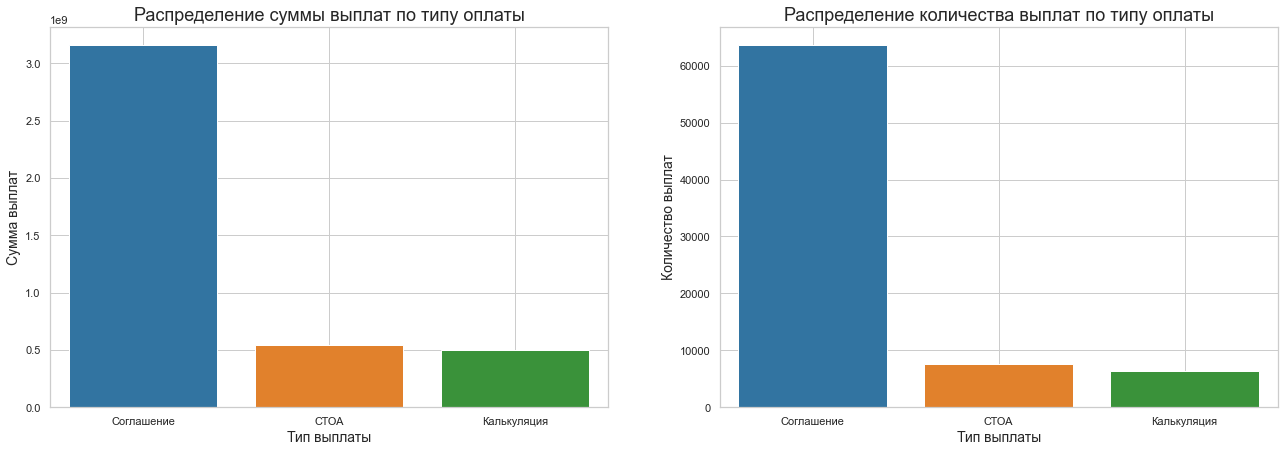

In [36]:
plt.figure(figsize=(22, 7))
# строоим график сумма выплат по типу оплаты
plt.subplot(1, 2, 1)
sns.barplot(x='payment_type', y='sum', data=pay_type).\
set_title('Распределение суммы выплат по типу оплаты', fontsize=18)
plt.xlabel('Тип выплаты', fontsize=14) 
#plt.title('Зависимости: ')
plt.ylabel('Сумма выплат', fontsize=14)
plt.grid(True) 

# строоим график количество выплат по типу оплаты
plt.subplot(1, 2, 2)
sns.barplot(x='payment_type', y='count', data=pay_type).\
set_title('Распределение количества выплат по типу оплаты', fontsize=18)
plt.xlabel('Тип выплаты', fontsize=14) 
plt.ylabel('Количество выплат', fontsize=14)
plt.grid(True) ;


Больше всего страховая компания выплатила компенсацию по типу оплаты соглашение. В шесть раз меньше было выплачено средств по типу оплаты СТОА и калькуляция. Также по количеству выплат лидирует тип оплаты соглашение (63649 выплат). Количество выплат СТОА и калькуляция примерно на одинаковом уровне, равном 7656 и 6437 соответственно. 

Рассмотрим суммарные выплаты по дням в разбивке по типу оплаты.

In [37]:
group_pay_type = df.groupby(['payment_type', 'payment_date']).agg({'amount': 'sum'})
group_pay_type

amount
payment_type payment_date             
Калькуляция  2021-07-19     1890873.17
             2021-07-20     1171202.48
             2021-07-21     1058151.85
             2021-07-22     1912306.29
             2021-07-23     2107146.24
...                                ...
Соглашение   2022-07-11     8708128.16
             2022-07-12     9329001.78
             2022-07-13     1923874.37
             2022-07-14    12129656.35
             2022-07-15    12436648.59

[723 rows x 1 columns]

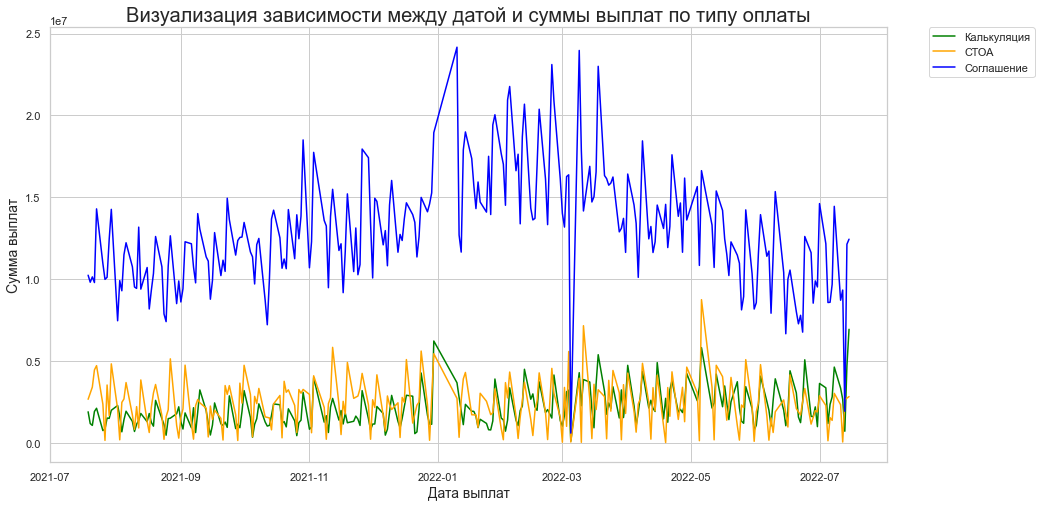

In [38]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='payment_date', y='amount', err_style=None, hue='payment_type', 
             palette={'СТОА':'orange','Соглашение':'b', 'Калькуляция':'g'}, data=group_pay_type).\
set_title('Визуализация зависимости между датой и суммы выплат по типу оплаты', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Дата выплат', fontsize=14)
plt.ylabel('Сумма выплат', fontsize=14);

На графике видно, что выплаты по соглашению находятся значительно выше выплат СТОА и калькуляции. Все три графика имеют скачкообразный вид. Наибольший размах суммарных расходов демонстрирует график "Соглашение". Рассмотрим средние значения выплат по типу оплаты.

In [39]:
group_pay_type.groupby('payment_type')['amount'].mean()

payment_type
Калькуляция    2.048693e+06
СТОА           2.346000e+06
Соглашение     1.290478e+07
Name: amount, dtype: float64

Наибольшее средние значения выплат по согласованию. Среднее значение выплат калькуляция и СТОА также примерно на одинаковом уровне. 

**Вывод**

Клиентам чаще всего возмещают убытки по соглашению, так как они заинтересованы в наиболее быстром способе получения компенсации. 
Данный тип выплат предполагает получение выгоды для страховой компании, так как оценка делается её специалистами. Следовательно, в интересах компании совершенствовать процессы, ведущие к оформлению способа оплаты по соглашению, путем нахождения оптимальных решений, удовлетворяющих интересы компании и клиента.

### Год выпуска авто

Рассмотрим как влияет год выпуска авто на страховые случаи.

In [40]:
group_release_year = df.groupby(['release_year', 'payment_date']).agg({'amount': 'sum'})
group_release_year.sort_values(by = 'amount', ascending = False).head(10)

amount
release_year payment_date            
2013         2022-05-06    3382082.41
2011         2022-04-22    3059848.41
2012         2022-02-28    3039267.14
2008         2022-01-28    2959345.91
2012         2022-04-01    2903711.19
2011         2022-02-11    2827327.31
2013         2022-03-09    2809700.00
2011         2022-01-28    2801406.10
             2021-12-24    2787546.54
2013         2022-02-04    2770550.00

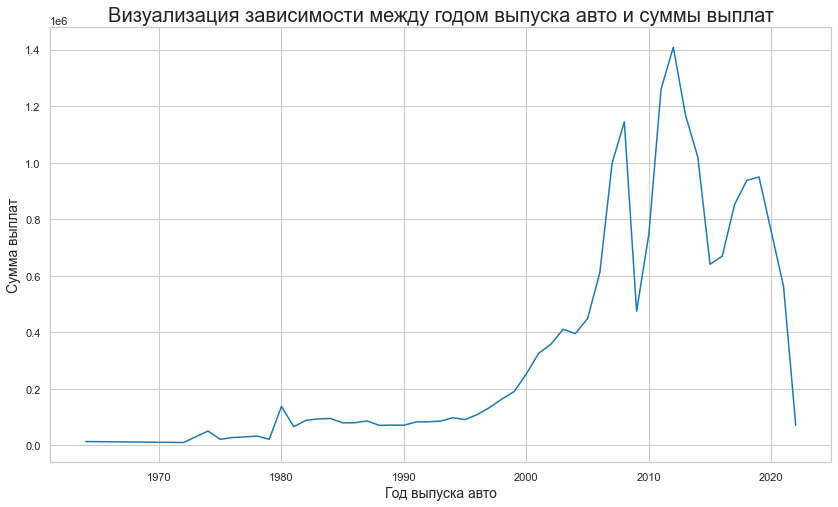

In [41]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='amount', err_style=None, data=group_release_year).\
set_title('Визуализация зависимости между годом выпуска авто и суммы выплат', fontsize=20)
plt.xlabel('Год выпуска авто', fontsize=14)
plt.ylabel('Сумма выплат', fontsize=14);

Основные выплаты приходятся на автомобили старше 2000 г. Больше всего компания потратила средства на страховые случаи для автомобилей с годом выпуска 2008, 2011, 2012, 2013.

Рассмотрим динамику роста оплаты страховых случаев в зависимости от года выпуска авто и типа оплаты страховки.

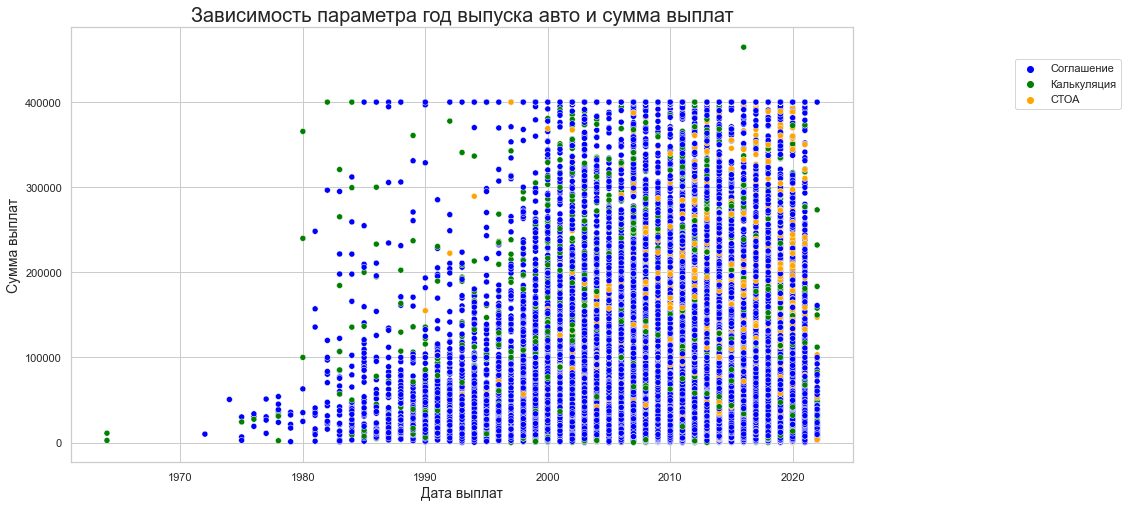

In [42]:
plt.figure(figsize=(14, 8))
sp = sns.scatterplot(x='release_year', y='amount', hue="payment_type", 
                     palette={'СТОА':'orange','Соглашение':'b', 'Калькуляция':'g'}, data=df)
sp.legend(loc='center right', bbox_to_anchor=(1.35, 0.87), ncol=1)
sp.set_title('Зависимость параметра год выпуска авто и сумма выплат', fontsize=20)
sp.set_xlabel('Дата выплат', fontsize=14)
sp.set_ylabel('Сумма выплат', fontsize=14);

<Figure size 1152x504 with 0 Axes>

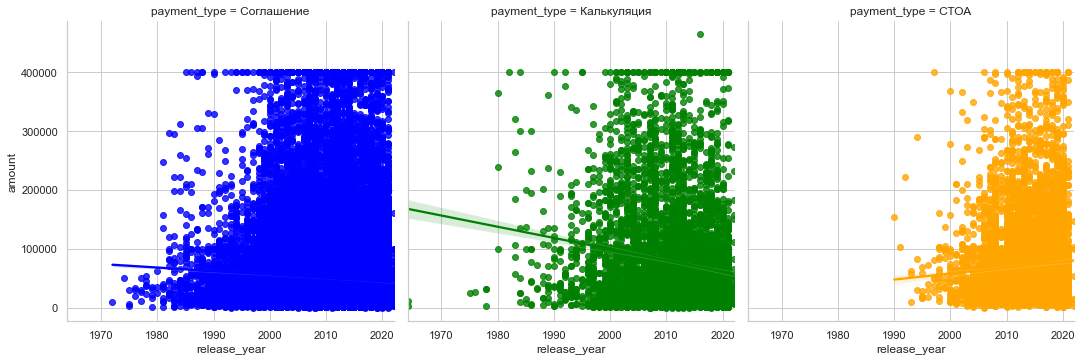

In [43]:
plt.figure(figsize=(16, 7))
sp2 = sns.lmplot(x="release_year", y="amount", hue="payment_type", col="payment_type",
           palette={'СТОА':'orange','Соглашение':'b', 'Калькуляция':'g'}, data=df);

Для типа оплаты соглашение и калькуляция характерен убывающий тренд стоимости от года выпуска авто, а для СТОА возрастающий. Возможно стоит пересмотреть станции технического обслуживания, с которыми у компании подписан договор о сотрудничестве, и постараться найти более выгодные для сотрудничества.  

### Выплаты с перестраховочным пулом

In [44]:
df.query('payment_date > "2022-04-19"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17043 entries, 344 to 77742
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   branch                 17043 non-null  object        
 1   payment_date           17043 non-null  datetime64[ns]
 2   amount                 17043 non-null  float64       
 3   settlement_process     17043 non-null  object        
 4   release_year           17043 non-null  int64         
 5   category_release_year  17043 non-null  object        
 6   payment_type           17043 non-null  object        
 7   concluded_agreement    13069 non-null  object        
 8   reinsurance_pool       185 non-null    object        
 9   new_em                 971 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In [45]:
print('Процент выплат, относящихся к перестраховочному пулу: {:.2f} %'.format(185/17043*100))

Процент выплат, относящихся к перестраховочному пулу: 1.09 %


В период с 19.04.2019 г. было зафиксировано 185 кейсов страховочного пула. Данная механика выгодна для компании, но сейчас она распространяется на незначительный процент страховых случаев.  

### Выплаты с новой ЕМ

In [46]:
df.query('payment_date > "2022-06-19"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5120 entries, 394 to 77742
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   branch                 5120 non-null   object        
 1   payment_date           5120 non-null   datetime64[ns]
 2   amount                 5120 non-null   float64       
 3   settlement_process     5120 non-null   object        
 4   release_year           5120 non-null   int64         
 5   category_release_year  5120 non-null   object        
 6   payment_type           5120 non-null   object        
 7   concluded_agreement    3770 non-null   object        
 8   reinsurance_pool       107 non-null    object        
 9   new_em                 971 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 440.0+ KB


In [47]:
print('Процент выплат, на которые распространяется новая ЕМ система: {:.2f} %'.format(971/5120*100))

Процент выплат, на которые распространяется новая ЕМ система: 18.96 %


В период с 19.06.2019 г. была зафиксирована 971 выплата с новой ЕМ системой.

### Процесс урегулирования 

In [48]:
group_settlement_process = df.groupby('settlement_process').\
    agg({'amount':'sum', 'branch':'count'}).sort_values(by = 'amount', ascending = False).reset_index().\
    rename(columns={'amount':'sum', 'branch':'count'}).head(10)
group_settlement_process

,settlement_process,sum,count
0,ОСАГО (ПВУ),2.846636e+09,57467
1,ОСАГО (Традиция),1.363582e+09,20275


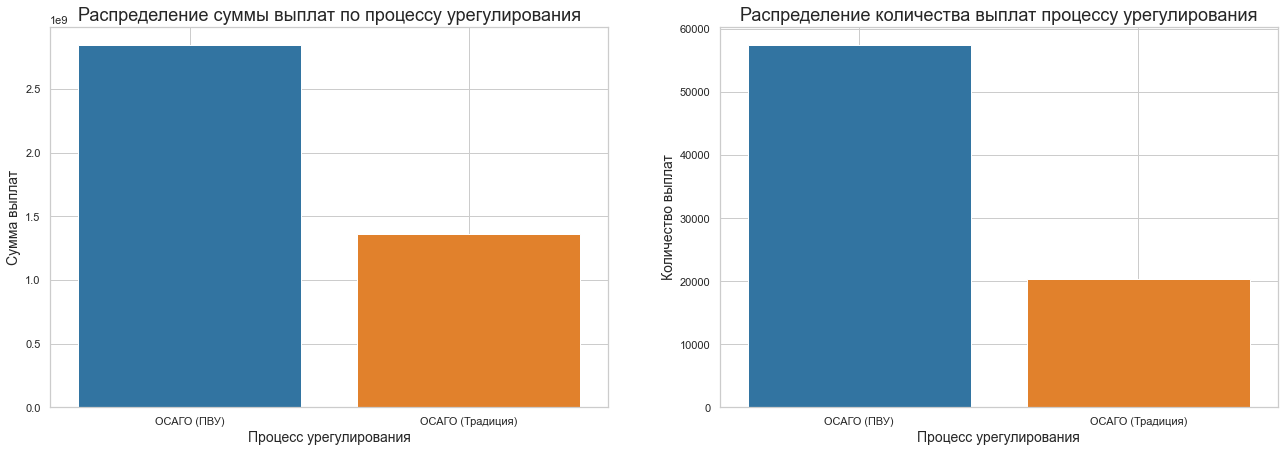

In [49]:
plt.figure(figsize=(22, 7))
# строоим график сумма выплат по типу оплаты
plt.subplot(1, 2, 1)
sns.barplot(x='settlement_process', y='sum', data=group_settlement_process).\
set_title('Распределение суммы выплат по процессу урегулирования', fontsize=18)
plt.xlabel('Процесс урегулирования', fontsize=14) 
plt.ylabel('Сумма выплат', fontsize=14)
plt.grid(True) 

# строоим график количество выплат по типу оплаты
plt.subplot(1, 2, 2)
sns.barplot(x='settlement_process', y='count', data=group_settlement_process).\
set_title('Распределение количества выплат процессу урегулирования', fontsize=18)
plt.xlabel('Процесс урегулирования', fontsize=14) 
plt.ylabel('Количество выплат', fontsize=14)
plt.grid(True);

In [50]:
group_settlement_process_time = df.groupby(['settlement_process', 'payment_date']).agg({'amount': 'sum'})
group_settlement_process_time

amount
settlement_process payment_date             
ОСАГО (ПВУ)        2021-07-19     8737241.99
                   2021-07-20     8403400.54
                   2021-07-21    10296458.76
                   2021-07-22    11186413.90
                   2021-07-23    15260862.73
...                                      ...
ОСАГО (Традиция)   2022-07-11     5437329.72
                   2022-07-12     4409664.85
                   2022-07-13     1376735.42
                   2022-07-14     5893384.12
                   2022-07-15     8405310.15

[490 rows x 1 columns]

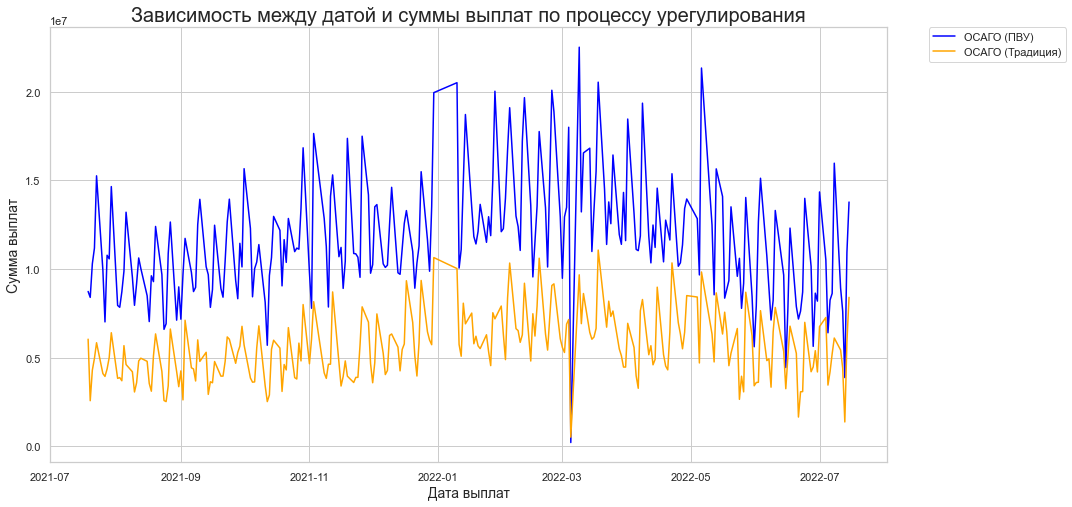

In [51]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='payment_date', y='amount', err_style=None, hue='settlement_process', 
             palette={'ОСАГО (ПВУ)':'b','ОСАГО (Традиция)':'orange'}, data=group_settlement_process_time).\
set_title('Зависимость между датой и суммы выплат по процессу урегулирования', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Дата выплат', fontsize=14)
plt.ylabel('Сумма выплат', fontsize=14);

In [52]:
round(group_settlement_process['count'][0]/(group_settlement_process['count'][0] + group_settlement_process['count'][1])*100)

74

Процесс урегулирования ОСАГО (ПВУ) составляет 74% от общего.

In [53]:
round(group_settlement_process['count'][1]/(group_settlement_process['count'][0] + group_settlement_process['count'][1])*100)

26

Процесс урегулирования ОСАГО (Традиция) составляет 26% от общего.

## Вывод

В ходе работы была произведена предобработка данных: обработка пропусков и дубликатов, проверка и корректировка типов данных, поиск и анализ выбросов (исключение строки с аномальным значением суммы выплаты, замена отсутствующих значений в столбце "год выпуска авто" на медианное значение). 

Результате исследовательского анализа сделаны следующие вывод:
* временные границы с 2022-07-15 по 2021-07-19 
* Тюменский, Екатеринбургский, Краснодарский, Новосибирский, Московский, Якутский, Сургутский, Кировский, Нижегородский и Уфимский филиалы с самыми большими страховыми выплатами 
* выплаты по соглашению значительно больше по размеру и количеству, чем выплаты СТОА и калькуляции
* основные выплаты приходятся на автомобили старше 2000 г. (а именно на автомобили с годом выпуска 2008, 2011, 2012, 2013 г.)
* для типа оплаты соглашение и калькуляция характерен убывающий тренд стоимости от года выпуска авто, а для СТОА возрастающий
* в период с 19.04.2019 г. было зафиксировано 185 кейсов страховочного пула, что составляет 1.09 % от общих
* в период с 19.06.2019 г. была зафиксирована 971 выплата с новой ЕМ системой, что составляет 18.96 % от общих
* процесс урегулирования ОСАГО (ПВУ) составляет 74%, процесс урегулирования ОСАГО (Традиция) составляет 26% от общего.